# Overview:

## What are Smart grids?
### A Smart Grid is an electricity network that use digital technologies, sensors and software to monitor and manage the transport of electricity from all generation sources (renewable, non-renewable and DERs(Distributed Energy Resources) to meet the varying electricity demands of end users. 
### Smart grids co-ordinate the needs and capabilities of all generators, grid operators, end users and electricity market stakeholders to operate all parts of the system as efficiently as possible, minimising costs and environmental impacts while maximising system reliability, resilience, flexibility and stability.
### A Smart Grid is an IoT-based application and uses real-time data on energy consumption to balance electricity supply and demand. Key components of the grid are sensors, wireless modules, monitoring systems and ICT infrastructures.

# Understanding the Data
### About the Data:
The Smart Grid Real-Time Load Monitoring Dataset is a time-series dataset designed for energy management, load forecasting, and fault detection in smart grids. It includes key electrical parameters, renewable energy sources, environmental factors, and anomaly indicators, making it suitable for machine learning and deep learning applications in energy optimization. 

### Data Generation Process:
The dataset consists of experimental data, collected from smart grid systems with a focus on real-time load forecasting and fault detection. The observations were generated based on:
- Real-world smart grid logs from operational data (voltage, current, power usage, fault indicators).
- Simulated data based on historical patterns of power demand and disruptions in a Micro Grid environment.
- Time-series data reflecting dynamic changes in energy consumption and load fluctuations.
### Dataset Link:
https://www.kaggle.com/datasets/ziya07/smart-grid-real-time-load-monitoring-dataset

# Read the Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import warnings
import tensorflow as tf
warnings.filterwarnings('ignore')
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_auc_score,classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import precision_recall_curve
from scipy.stats import uniform, randint
from IPython.display import Image, display
from statsmodels.tsa.seasonal import seasonal_decompose
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from scikeras.wrappers import KerasClassifier
import statsmodels.api as sm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier


In [4]:
smart_grid_data = pd.read_csv('Downloads/smart_grid_dataset.csv', parse_dates=["Timestamp"], sep = ",")

In [5]:
smart_grid_data.head()

,Timestamp,Voltage (V),Current (A),Power Consumption (kW),Reactive Power (kVAR),Power Factor,Solar Power (kW),Wind Power (kW),Grid Supply (kW),Voltage Fluctuation (%),Overload Condition,Transformer Fault,Temperature (°C),Humidity (%),Electricity Price (USD/kWh),Predicted Load (kW)
0,2024-01-01 00:00:00,232.483571,5.124673,1.191402,0.399029,0.907766,46.614845,26.399566,0.0,1.055937,0,0,17.842767,64.523353,0.416156,1.233158
1,2024-01-01 00:15:00,229.308679,22.213519,5.093753,1.248030,0.831813,6.907170,18.555011,0.0,-3.910902,1,0,18.753698,49.671940,0.492334,5.247824
2,2024-01-01 00:30:00,233.238443,46.132217,10.759806,2.790464,0.999005,15.477640,12.905025,0.0,-0.197551,0,0,16.719325,48.472769,0.427785,10.580278
3,2024-01-01 00:45:00,237.615149,47.648972,11.322118,1.956965,0.896462,35.746398,28.937129,0.0,2.671921,0,0,15.364564,75.766776,0.487953,11.225946
4,2024-01-01 01:00:00,228.829233,7.410166,1.695663,0.624718,0.870681,27.555038,14.184648,0.0,3.826937,0,0,38.760333,61.384213,0.290078,1.696639


In [100]:
smart_grid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Timestamp                    50000 non-null  datetime64[ns]
 1   Voltage (V)                  50000 non-null  float64       
 2   Current (A)                  50000 non-null  float64       
 3   Power Consumption (kW)       50000 non-null  float64       
 4   Reactive Power (kVAR)        50000 non-null  float64       
 5   Power Factor                 50000 non-null  float64       
 6   Solar Power (kW)             50000 non-null  float64       
 7   Wind Power (kW)              50000 non-null  float64       
 8   Grid Supply (kW)             50000 non-null  float64       
 9   Voltage Fluctuation (%)      50000 non-null  float64       
 10  Overload Condition           50000 non-null  int64         
 11  Transformer Fault            50000 non-nu

# Understanding the Features

### Input Variables:
- Timestamp - Time of sampling, datetime
#### Smart grid parameters
- Voltage - Represents the electrical potential difference, essentially the "pressure" that drives the current through a circuit. It is measured in Volts. In the given dataset range of the Voltage is 208 volts to 252 volts. In smart grids, acceptable voltage fluctuation is generally considered to be within a ±5% range of the nominal voltage (which is the Standard Voltage level and values are different in various parts of the world)  
- Current - Amount of current flowing through the Smart grid in Amperes.
- Power consumption - Electricity drawn from the grid, kW
- Reactive power - It is the electrical power that oscillates between the load and the source without performing any useful work, however it maintains the voltage stability and power quality
- Power Factor - Power Factor is the ratio of useful power to apparent power and is impacted by the Reactive Power. 1-0.95 range is considered to be good. Lower values than this indicates inefficiencies in the grid and possible strain on the equipment
- Voltage fluctuation % - In smart grids, acceptable voltage fluctuation is generally considered to be within a ±5% range of the nominal voltage (which is the Standard Voltage level and values are different in various parts of the world)
- Predicted Load (kW): Target variable for real-time energy forecasting.
#### Renewable energy sources: 
- Solar Power - Solar power contribution in the Grid supply
- Wind power - Wind power contribution in the Grid Supply.
- Grid supply - Measures power drawn from the main grid.
#### Fault detection: 
The fault detection target variable was assigned based on a combination of logical-mathematical rules and threshold-based anomaly detection techniques:
1. Voltage Drop Analysis: If the voltage falls below a pre-defined threshold (e.g., 10% drop from nominal voltage), it is flagged as a potential fault.
2. Current Overload Detection: If the current exceeds the system’s rated limit, it indicates a fault due to overload.
3. Power Imbalance Check: Sudden variations in power consumption (e.g., extreme peaks or dips) suggest an instability in the grid.
4. Blackout Prediction: A combination of multiple failures (voltage instability, frequency fluctuations) indicates a potential blackout risk.
Machine Learning-Based Fault Prediction: The ABWK-RLSTM model learns from past data trends and predicts whether a given set of readings is likely to cause a failure.

Each observation in the dataset is labeled as:

    - 0 → No fault detected (normal operation)
    - 1 → Voltage drop detected
    - 2 → Overload detected
    - 3 → Blackout risk identified

- Overload Condition - Identifies overload conditions 
- Transformer Faults - Identifies Faults based on above description
#### Environmental factors: 
- Temperature - Temperature in deg C
- Humidity - Air Humidity %
#### Economic factors:
- Electricity price - Price in USD/kWh

### Time Series Analysis
Does the data have any seasonal/trend components?

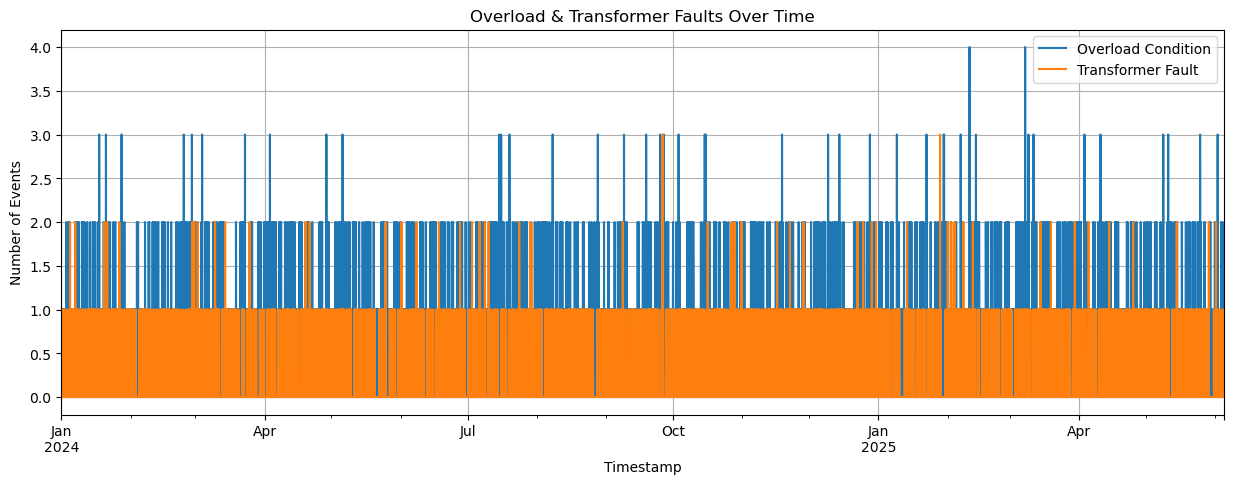

In [83]:
## Look at the Hourly event counts
## Copy the data in to a dataframe for analysis
smart_grid_analysis_data = smart_grid_data
smart_grid_analysis_data.set_index("Timestamp", inplace=True)
# Resample to hourly counts of events
hourly_faults = smart_grid_analysis_data.resample("H")[["Overload Condition", "Transformer Fault"]].sum()
# Plot
hourly_faults.plot(figsize=(15, 5), title="Overload & Transformer Faults Over Time")
plt.ylabel("Number of Events")
plt.xlabel("Timestamp")
plt.grid(True)
plt.show()

#### Overload occurs more fequently than the faults and may indicate stressed transformer capacity or demand surges. Transformer faults are sporadic but present throughout the time period. No clear seasonal drops or rise in overloads and faults.

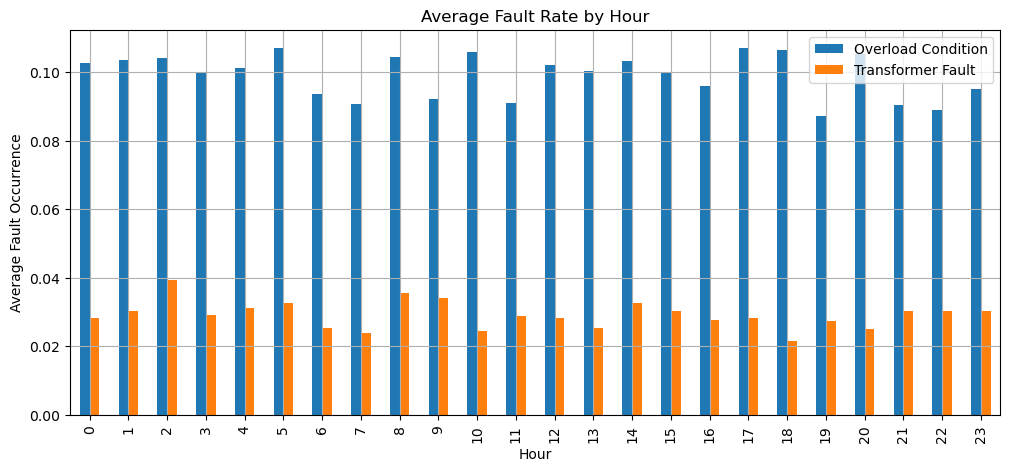

In [84]:
# Average hourly fault rate
smart_grid_analysis_data["Hour"] = smart_grid_data.index.hour

# Average fault rate by hour
hourly_avg = smart_grid_analysis_data.groupby("Hour")[["Overload Condition", "Transformer Fault"]].mean()

# Plot
hourly_avg.plot(kind="bar", figsize=(12, 5), title="Average Fault Rate by Hour")
plt.ylabel("Average Fault Occurrence")
plt.grid(True)
plt.show()

#### No clear hourly trend - overloads are more prominent than faults.

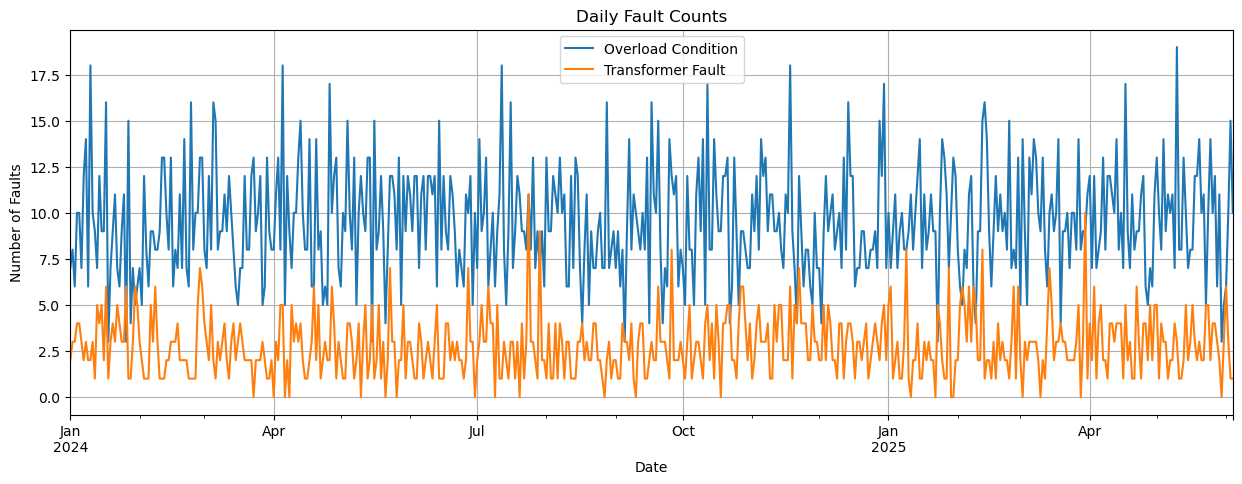

In [87]:
daily_summary = smart_grid_analysis_data.resample("D")[["Overload Condition", "Transformer Fault"]].sum()

# Plot daily fault count
daily_summary.plot(figsize=(15, 5), title="Daily Fault Counts")
plt.ylabel("Number of Faults")
plt.xlabel("Date")
plt.grid(True)
plt.show()

#### Overload faults are more frequent, volatile, and possibly load-dependent. Transformer faults are steadier and fewer, indicating relatively stable transformer operation—though persistent issues may still exist.

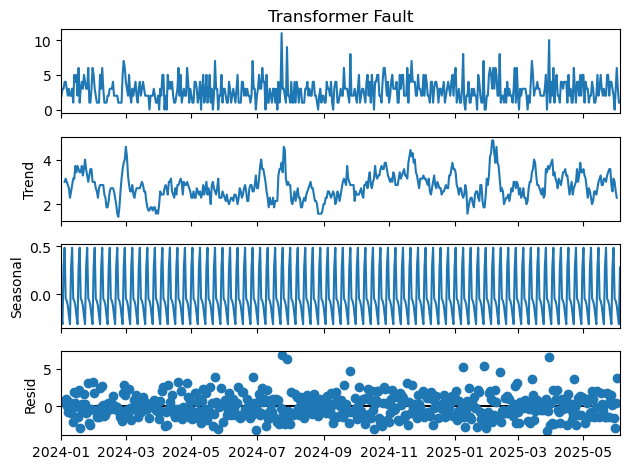

In [95]:
#Seasonal Decomposition for Transformer Faults
result_air = seasonal_decompose(daily_summary['Transformer Fault'])
result_air.plot()
plt.show()

#### Analysis:
- The original raw time series data appears noisy with regular ups and downs and fluctuates between 0 and 10 per day.
- The Trend shows recurring periods of increased transformer faults.
- Repeating, regular pattern with magnitude of +/- 0.5 indicating that the faults follow a predictable short-term pattern
- Residuals are random noise, scattered with no pattern indicating that the trend and seasonality captured most of the systematic structure.

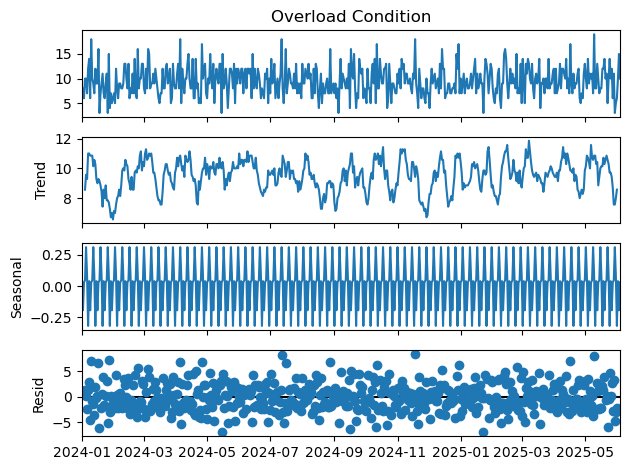

In [94]:
result_air = seasonal_decompose(daily_summary['Overload Condition'])
result_air.plot()
plt.show()

#### Analysis
- The original raw time series data appears noisy with regular ups and downs and indicates that the system experiences frequent overload events.
- The Trend shows medium term cyclical behavior. No upward or downward long-term trend, but noticeable oscillations, possibly seasonal or demand driven.
- Repeating, regular pattern with magnitude of +/- 0.3  indicating the overloads follow a recurring pattern.
- Residuals are random noise, scattered with no pattern indicating that the trend and seasonality captured most of the systematic structure.

# Task
The task is to utilize the data to train a model which can detect the appropriate conditions (Voltage, Voltage change, current, Temperature, humidity Reactive power, power factor) for a Fault or Overload to occur in a smart electric grid. When the fault or overload happens additional systematic processes can happen to divert additional power in the grid or alert personnel to send maintenance crew or take action. This will save utility companies from downtimes, extra repair/replacement cost on the grid.

# Engineering Features

In [6]:
# Dropping columns that are not required for training the model
smart_grid_data.drop('Predicted Load (kW)', axis=1, inplace=True)
smart_grid_data.drop('Electricity Price (USD/kWh)', axis=1, inplace=True)
smart_grid_data.drop('Timestamp', axis=1, inplace=True)
smart_grid_data.drop('Solar Power (kW)', axis=1, inplace=True)
smart_grid_data.drop('Wind Power (kW)', axis=1, inplace=True)
# Since we want to alert on the Overload as well as the Fault condition, combine them in to one column
smart_grid_data.loc[smart_grid_data['Overload Condition'] == 1, 'Transformer Fault '] = 1
smart_grid_data.rename(columns={'Transformer Fault': 'Overload_OR_Fault'}, inplace=True)
smart_grid_data.drop('Overload Condition', axis=1, inplace=True)

In [7]:
# Since we want to alert before the event occurs, we will shift the Target data i.e. Overload_OR_Fault indicator 
# one place up in the dataframe and drop the last record
smart_grid_data['Target'] = smart_grid_data['Overload_OR_Fault'].shift(-1)
smart_grid_data.dropna(inplace=True)
smart_grid_data.drop('Overload_OR_Fault', axis=1, inplace=True)

In [8]:
# Prepping the data for the model
X = smart_grid_data.drop(columns='Target')
y = smart_grid_data['Target']
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [9]:
# Standardizing the numeric data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Baseline model

In [110]:
#Get the class counts
class_counts = y_train.value_counts()

# Baseline Accuracy calculation
majority_class = class_counts.idxmax()
baseline_accuracy = class_counts.max() / class_counts.sum()

print(f"Baseline Accuracy that our classifier should aim to beat: {baseline_accuracy:.2f}")

Baseline Accuracy that our classifier should aim to beat: 0.87


# Building and Comparing models

In [12]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

0
Training Random Forest model...
Fitting 3 folds for each of 36 candidates, totalling 108 fits
0.7928
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      8744
         1.0       0.11      0.09      0.10      1256

    accuracy                           0.79     10000
   macro avg       0.49      0.49      0.49     10000
weighted avg       0.78      0.79      0.78     10000



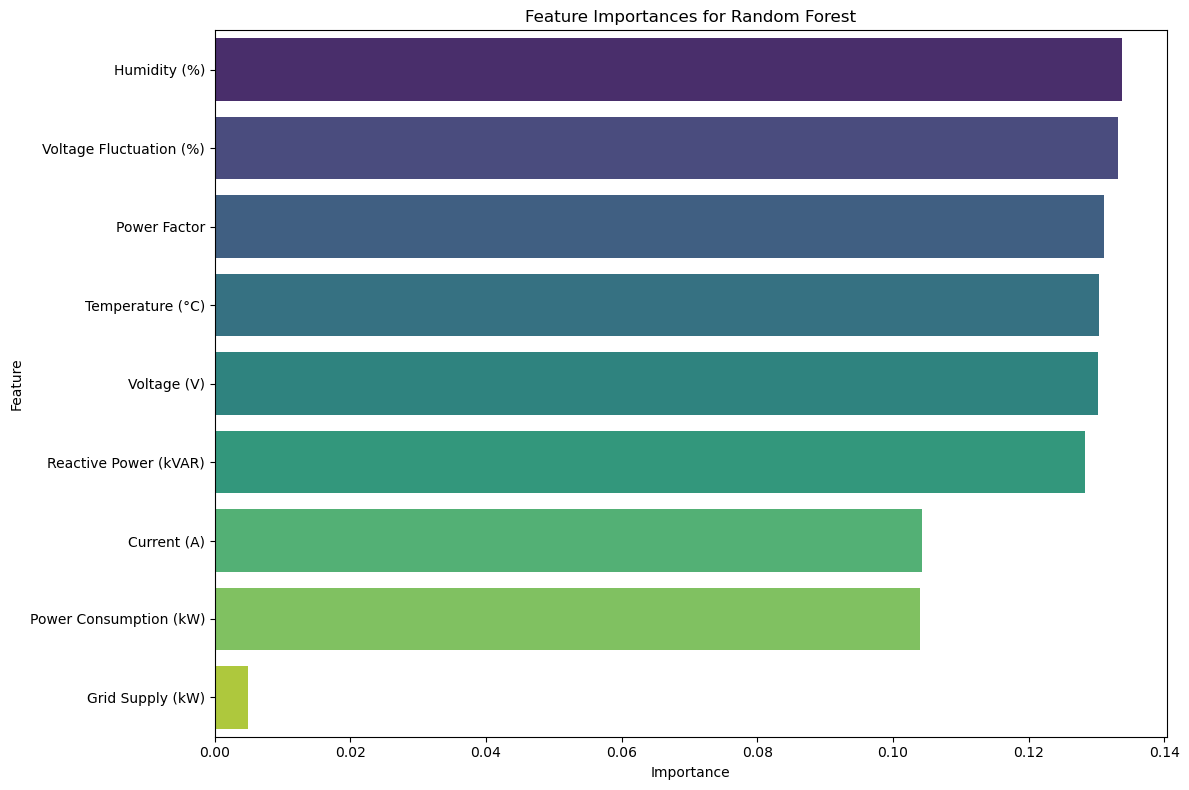

1
Training Logistic Regression model...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
0.4902
Best parameters: {'C': 0.01, 'penalty': 'l1'}
              precision    recall  f1-score   support

         0.0       0.87      0.49      0.63      8744
         1.0       0.12      0.50      0.20      1256

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.41     10000
weighted avg       0.78      0.49      0.57     10000



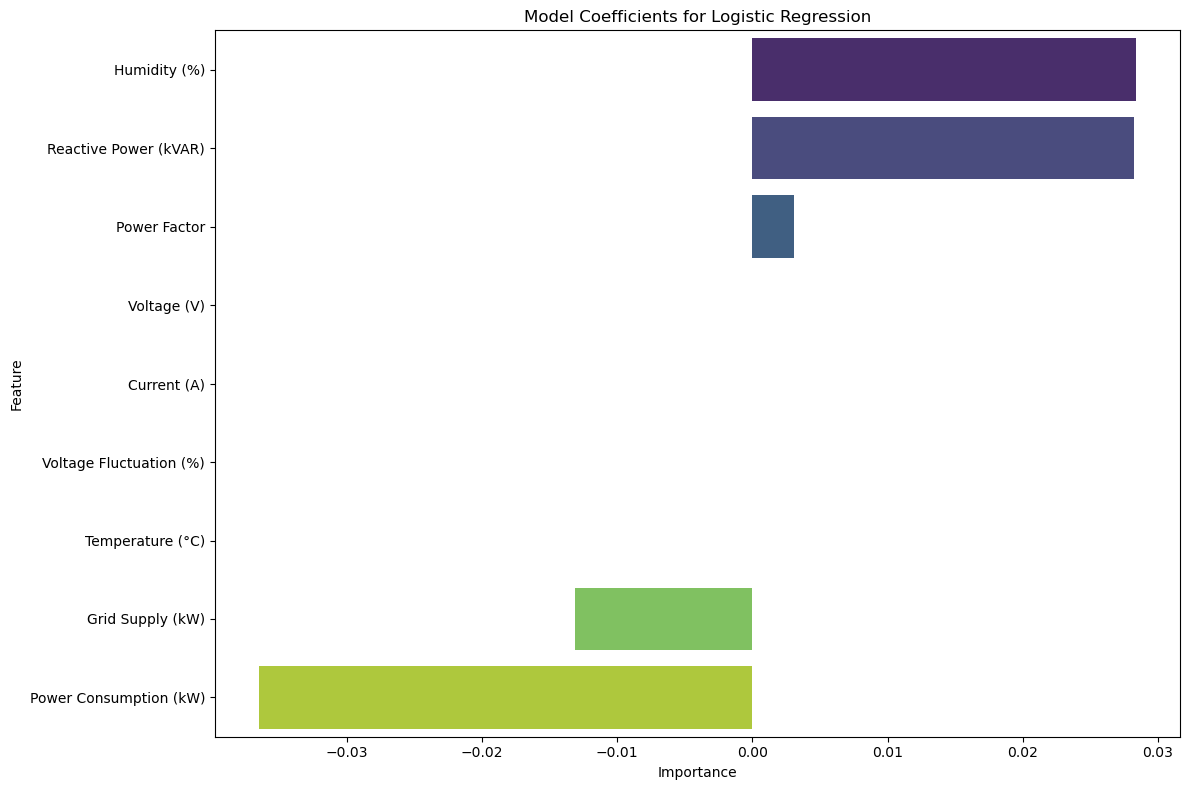

2
Training KNN model...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
0.646
Best parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
              precision    recall  f1-score   support

         0.0       0.87      0.70      0.77      8744
         1.0       0.12      0.29      0.17      1256

    accuracy                           0.65     10000
   macro avg       0.50      0.50      0.47     10000
weighted avg       0.78      0.65      0.70     10000



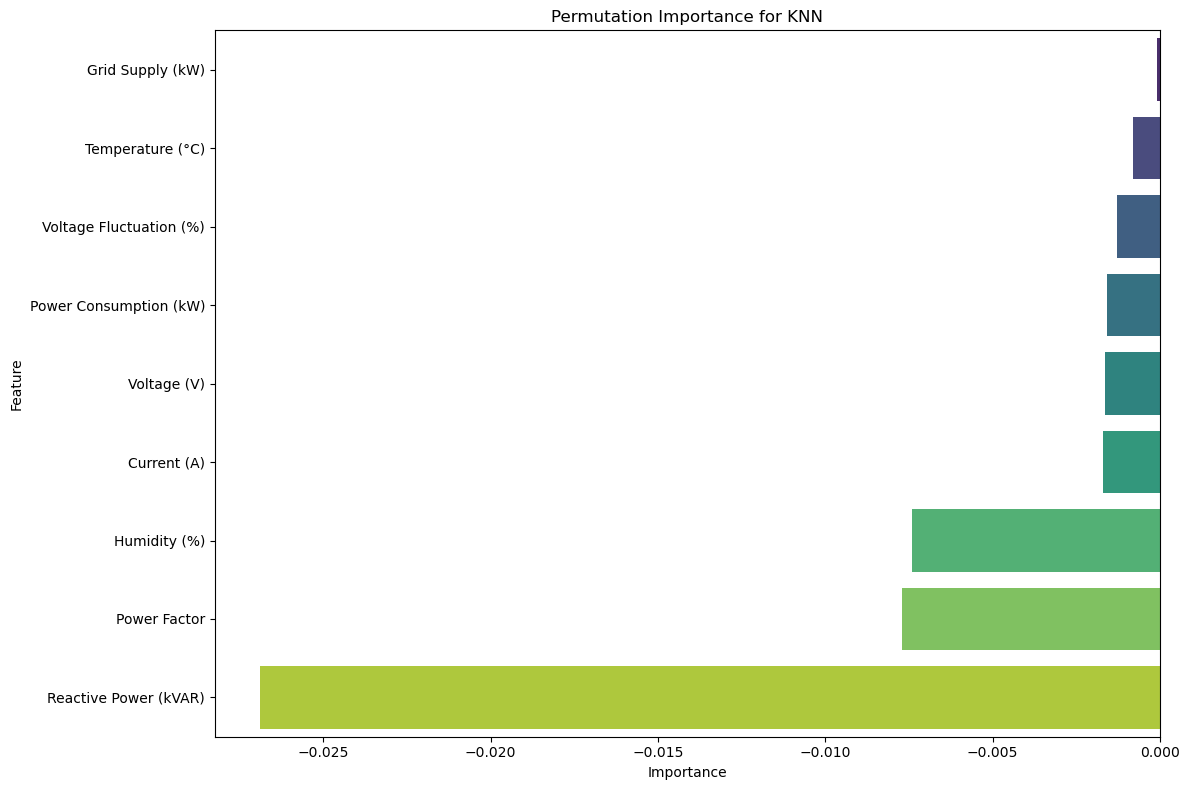

3
Training Decision Tree model...
Fitting 3 folds for each of 135 candidates, totalling 405 fits
0.6525
Best parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

         0.0       0.87      0.71      0.78      8744
         1.0       0.12      0.29      0.17      1256

    accuracy                           0.65     10000
   macro avg       0.50      0.50      0.48     10000
weighted avg       0.78      0.65      0.70     10000



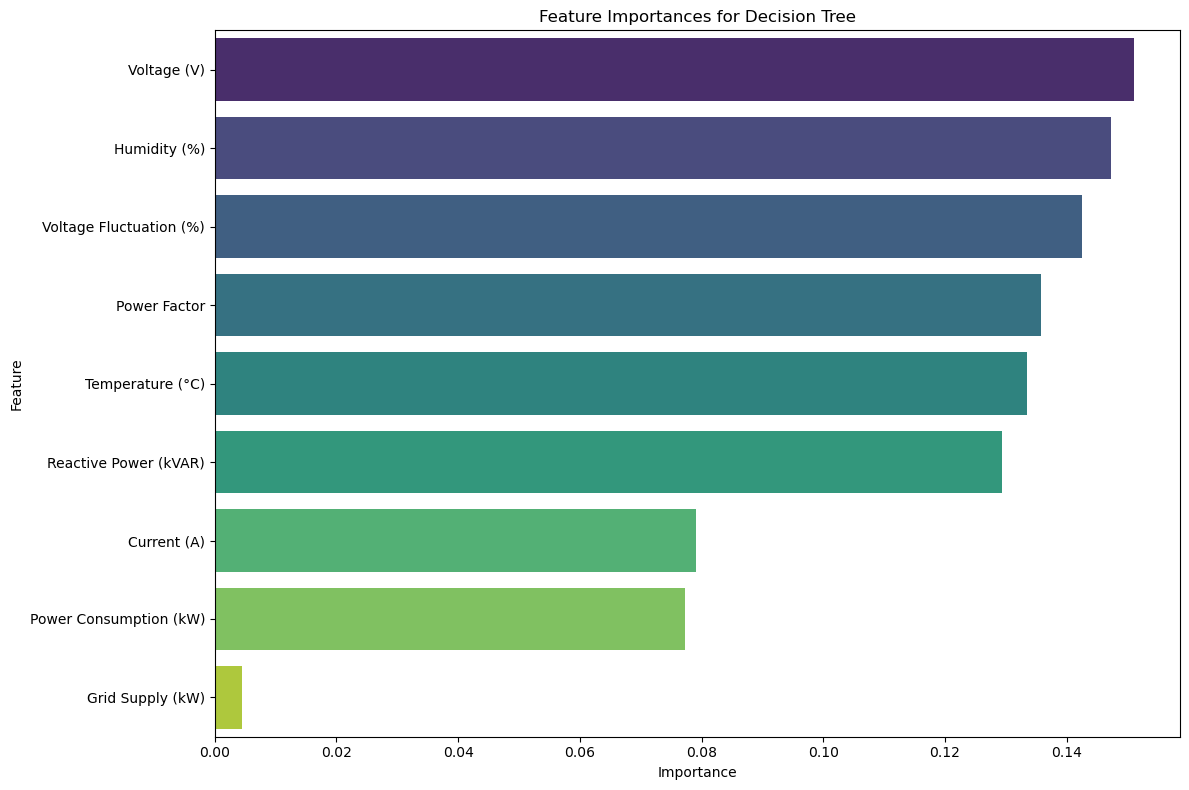

4
Training SVM model...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
0.4146
Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
              precision    recall  f1-score   support

         0.0       0.87      0.39      0.54      8744
         1.0       0.13      0.61      0.21      1256

    accuracy                           0.41     10000
   macro avg       0.50      0.50      0.37     10000
weighted avg       0.78      0.41      0.49     10000



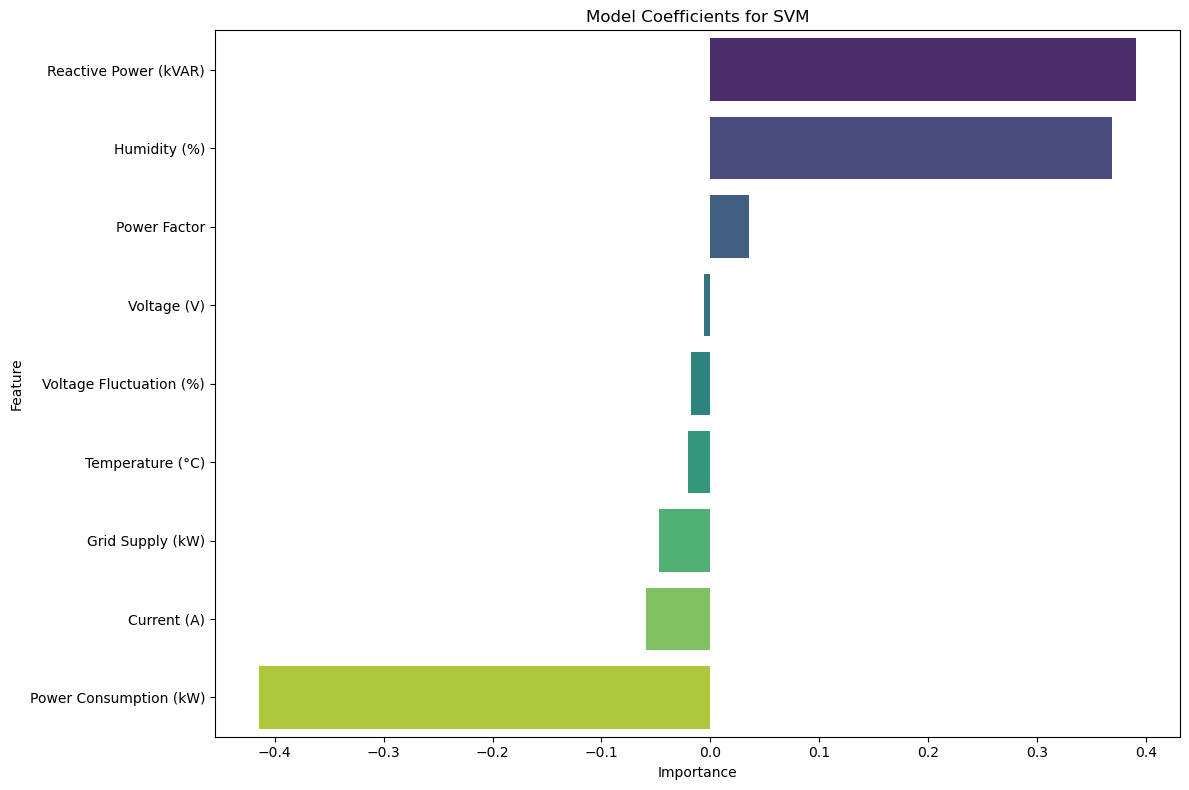


Summary of Model Performance:
                 Model                                    Best Parameters  \
0        Random Forest  {'max_depth': None, 'min_samples_leaf': 1, 'mi...   
1  Logistic Regression                       {'C': 0.01, 'penalty': 'l1'}   
2                  KNN  {'metric': 'euclidean', 'n_neighbors': 3, 'wei...   
3        Decision Tree  {'criterion': 'entropy', 'max_depth': None, 'm...   
4                  SVM   {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}   

   Best CV Accuracy Score  Test Accuracy Score  Yes Class Precision  \
0                0.869025               0.7928             0.109195   
1                0.508620               0.4902             0.122742   
2                0.822564               0.6460             0.122105   
3                0.718536               0.6525             0.122491   
4                0.507033               0.4146             0.125326   

   No Class Precision  Yes Class Recall  No Class Recall  Yes Class F1 Score  \

In [124]:
feature_names = X_train.columns.tolist()
results = []
data = {'Model Name':['Random Forest','Logistic Regression','KNN','Decision Tree','SVM'],
        'Model':[RandomForestClassifier(random_state=42), LogisticRegression(solver='liblinear'),KNeighborsClassifier(),DecisionTreeClassifier(),SVC()], 
        'Params':[{'n_estimators': [100, 200,300],'max_depth': [None, 10, 20],'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]},
               {'C':[0.01,0.1,1,10,100], 'penalty':['l1','l2']},
               {'n_neighbors': [3, 12,15,20,22,25],'weights': ['uniform', 'distance'],'metric': ['euclidean', 'manhattan']},
               {'criterion': ['gini', 'entropy', 'log_loss'],'max_depth': [None, 3, 5, 10, 20],'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
               {'C': [0.1, 10],'kernel': ['linear'],'gamma': ['scale', 'auto']}]}
        
for i, model_name in enumerate(data['Model Name']):
    print(i)
    print(f"Training { model_name} model...")
    grid = GridSearchCV(data['Model'][i], data['Params'][i], cv=3, scoring = 'accuracy', verbose = 1)
    grid.fit(X_train_bal, y_train_bal)
    y_test_pred = grid.best_estimator_.predict(X_test_scaled)
    test_score = accuracy_score(y_test, y_test_pred)
    print(test_score)
    print("Best parameters:", grid.best_params_)
    print(classification_report(y_test, y_test_pred))  
    if hasattr(grid.best_estimator_, 'feature_importances_'):
        # For tree-based models
        importances = grid.best_estimator_.feature_importances_
        method = 'Feature Importances'
    elif hasattr(grid.best_estimator_, 'coef_'):
        # For linear models (e.g., Logistic Regression, Linear SVC)
        importances = grid.best_estimator_.coef_[0]  
        method = 'Model Coefficients'
    else:
        # Fallback: permutation importance for models without native importance
        perm_result = permutation_importance(grid.best_estimator_, X_test_scaled, y_test, n_repeats=2, random_state=42)
        importances = perm_result.importances_mean
        method = 'Permutation Importance'
        
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
    plt.figure(figsize=(12, 8))
    sns.barplot(data=importance_df, y='Feature', x='Importance', palette='viridis')
    plt.title(f'{method} for {model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()    
       
    results.append({
        'Model': data['Model Name'][i],
        'Best Parameters': grid.best_params_,
        'Best CV Accuracy Score': grid.best_score_,
        'Test Accuracy Score': test_score,
        'Yes Class Precision': precision_score(y_test, y_test_pred, pos_label=1.0),
        'No Class Precision': precision_score(y_test, y_test_pred, pos_label=0.0),
        'Yes Class Recall': recall_score(y_test, y_test_pred, pos_label=1.0),
        'No Class Recall': recall_score(y_test, y_test_pred, pos_label=0.0),
        'Yes Class F1 Score': f1_score(y_test, y_test_pred, pos_label=1.0),
        'No Class F1 Score': f1_score(y_test, y_test_pred, pos_label=0.0)
    })
results_df = pd.DataFrame(results)

# Print results
print("\nSummary of Model Performance:")
print(results_df)
#data['Train Time'].append(train_time)
#data['Train Accuracy'].append(svc_train_score)
#data['Test Accuracy'].append(svc_test_score)

## Interpretation of the Results
- Random Forest has the highest cross-validation and test accuracy of 87% and 79% respectively, however the recall and F1 scores are poor. It rarely correctly identifies the "Yes" - fault/overload scenario in this case.
- Logistic Regression has low test accuracy score 49%, however "Yes" recall is high 50% but low precision 12%.
- KNN has good accuracy 64.6% and a Yes recall of 29%. Balanced with moderate performance.
- Decision Tree is similar to KNN with accuracy of 64.8% and yes recall of 29%.
- SVM has lowest test accuracy of 41%, but highest recall of 61% and F1 score of 21%. Since the goal is to catch all "Yes" cases i.e. Overloads and Faults, SVM is the better fit despite the accuracy.

# Building the Neural Network Model

In [44]:
# Fix random seeds for reproducibility
tf.random.set_seed(42)
results= []

# Define model builder
def create_model(optimizer='adam', hidden_units=128, dropout_rate = 0.3):
    model = Sequential()
    model.add(Dense(hidden_units, activation='relu', input_shape=(X.shape[1],))),
    model.add(Dropout(dropout_rate)),
    model.add(Dense(hidden_units//2, activation='relu')),
    model.add(Dropout(dropout_rate)),
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Wrap the model
keras_model = KerasClassifier(
    model=create_model,
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['f1'],
    epochs=50,
    verbose=0,
    callbacks=[EarlyStopping(monitor='loss', patience=3)]
)


# Define GridSearchCV parameters
param_grid = {
    'model__optimizer': ['adam', 'sgd'],
    'model__hidden_units': [128],
    'batch_size': [32, 64],
    'epochs': [10, 20,30,50]
}

# Grid Search
grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, cv=3, scoring='f1')
grid_result = grid.fit(X_train_scaled, y_train, class_weight=class_weight_dict)
y_test_pred = grid_result.best_estimator_.predict(X_test_scaled)
test_score = accuracy_score(y_test, y_test_pred)

print(classification_report(y_test, y_test_pred))  
# Output best result
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

results.append({
        'Model': 'Neural Networks',
        'Best Parameters': grid_result.best_params_,
        'Best CV Accuracy Score': grid_result.best_score_,
        'Test Accuracy Score': test_score,
        'Yes Class Precision': precision_score(y_test, y_test_pred, pos_label=1.0),
        'No Class Precision': precision_score(y_test, y_test_pred, pos_label=0.0),
        'Yes Class Recall': recall_score(y_test, y_test_pred, pos_label=1.0),
        'No Class Recall': recall_score(y_test, y_test_pred, pos_label=0.0),
        'Yes Class F1 Score': f1_score(y_test, y_test_pred, pos_label=1.0),
        'No Class F1 Score': f1_score(y_test, y_test_pred, pos_label=0.0)
    })
results_df = pd.DataFrame(results)

# Print results
print("\nSummary of Model Performance:")
print(results_df)

              precision    recall  f1-score   support

         0.0       0.98      0.47      0.64       961
         1.0       0.04      0.74      0.08        31

    accuracy                           0.48       992
   macro avg       0.51      0.61      0.36       992
weighted avg       0.95      0.48      0.62       992

Best: 0.057613 using {'batch_size': 64, 'epochs': 10, 'model__hidden_units': 128, 'model__optimizer': 'sgd'}

Summary of Model Performance:
             Model                                    Best Parameters  \
0  Neural Networks  {'batch_size': 64, 'epochs': 10, 'model__hidde...   

   Best CV Accuracy Score  Test Accuracy Score  Yes Class Precision  \
0                0.057613             0.481855             0.043478   

   No Class Precision  Yes Class Recall  No Class Recall  Yes Class F1 Score  \
0            0.982721          0.741935         0.473465            0.082143   

   No Class F1 Score  
0           0.639045  
